# News Sentiment Analyzer & Stock Market Correlations
 by :  Aymen Mehai

# Introduction:
In this project I have collected news articles about Twitter , a social media company that was recently aqquired by billionaire Elon Musk, I plan to run a sentiment analysis on the news articles that I have collected from the The New York Times API. Then with the overall sentiment of the news articles come up with stock price predictions.

# Tools used:

https://docs.python.org/3/library/index.html

http://docs.python-requests.org/en/master/

https://pandas.pydata.org/pandas-docs/stable/

https://plot.ly/python/,

I had plans to use https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html,
but due to time I was not able to implement. 

In [1]:
#pip install wordcloud 
#pip install pandas_datareader
#ip install plotly

In [2]:
#Libraries
import requests
import json
import pandas as pd
import time
from collections import Counter
import ast
import matplotlib.pyplot as plt

# Part1: Scraping News

For this project we demonstrate how to use the New York Times Article Search API (http://developer.nytimes.com/). This is a free API and with this one can search New York Times articles. In order to use it, you must register on http://developer.nytimes.com/ for an API key.

In [3]:
#To scrape article for another company set company name here
company = "Twitter"
begin_date = 20211201
end_date = 20220519

#Define blank dataframe
df = pd.DataFrame([])

#Iterate from page 0-5
for page in range(0,5):
    url ="http://api.nytimes.com/svc/search/v2/articlesearch.json?q={}&page={}&fq=source:(%22The%20New%20York%20Times%22)AND%20headline:({})&begin_date={}&end_date={}&sort=oldest&api-key=78babcfadfbe468da2a609d2795c98cc".format(company, page, company, begin_date, end_date);
    #print(url)
    r = requests.get(url)
    
    #print(r.json()['response']['docs'])
    
    df = pd.DataFrame.from_dict(pd.read_json(url)['response']['docs'])

In [4]:
df=df.reset_index()
df.to_csv(company+'_news.txt', header=True)
df.head(1)

,index,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,...,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri,print_section,print_page
0,0,"Will he go hostile, what is Twitter really wor...",https://www.nytimes.com/2022/04/18/business/de...,"Will he go hostile, what is Twitter really wor...","Over the weekend, Twitter’s board put in place...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Five Big Questions for Elon Musk and...,"[{'name': 'persons', 'value': 'Musk, Elon', 'r...",2022-04-18T12:37:49+0000,...,Business,Business Day,DealBook,"{'original': 'By Andrew Ross Sorkin, Jason Kar...",News,nyt://article/1a6a37af-108a-56dd-9aba-5786d29f...,1786,nyt://article/1a6a37af-108a-56dd-9aba-5786d29f...,NaN,NaN


# Part1.1: Cleaning the Data


In [5]:
#Read news articles from csv to pandas dataframe
df= pd.read_csv(company+'_news.txt')
df.head()

#Data cleaning 
#dropping useless columns
df = df.drop(['Unnamed: 0', 'index', 'byline', 'document_type', 'multimedia', 'print_page', 'uri', 'section_name'], axis=1)

#Convert publication date to datetime object
df['pub_date'] = pd.to_datetime(df['pub_date'])

#Extract main headline from headline column
df['headline']= df['headline'].apply(eval).apply(lambda x: x['main'])

df.head()

,abstract,web_url,snippet,lead_paragraph,source,headline,keywords,pub_date,news_desk,subsection_name,type_of_material,_id,word_count,print_section
0,"Will he go hostile, what is Twitter really wor...",https://www.nytimes.com/2022/04/18/business/de...,"Will he go hostile, what is Twitter really wor...","Over the weekend, Twitter’s board put in place...",The New York Times,Five Big Questions for Elon Musk and Twitter,"[{'name': 'persons', 'value': 'Musk, Elon', 'r...",2022-04-18 12:37:49+00:00,Business,DealBook,News,nyt://article/1a6a37af-108a-56dd-9aba-5786d29f...,1786,NaN
1,After Twitter’s board put in place a poison pi...,https://www.nytimes.com/2022/04/18/business/th...,After Twitter’s board put in place a poison pi...,"Over the holiday weekend, Twitter’s board put ...",The New York Times,The big questions about what happens next in E...,[],2022-04-18 12:51:26+00:00,Business,NaN,News,nyt://article/a6fc6bcf-726b-5881-818d-44c1b60f...,601,NaN
2,Readers discuss the free speech and media owne...,https://www.nytimes.com/2022/04/18/opinion/let...,Readers discuss the free speech and media owne...,To the Editor:,The New York Times,Elon Musk’s Bid to Take Over Twitter,"[{'name': 'persons', 'value': 'Musk, Elon', 'r...",2022-04-18 16:16:00+00:00,Letters,Letters,Letter,nyt://article/b1b93688-f41b-5dc5-b0f3-04bc7c70...,1113,A
3,Investors have been skeptical that Elon Musk w...,https://www.nytimes.com/2022/04/18/business/ap...,Investors have been skeptical that Elon Musk w...,The private equity firm Apollo Global Manageme...,The New York Times,Apollo is said to be considering participating...,"[{'name': 'subject', 'value': 'Computers and t...",2022-04-18 21:07:23+00:00,Business,NaN,News,nyt://article/aedeec92-e5be-5f1c-8aac-a02902f0...,317,NaN
4,The world’s richest man is trying to shore up ...,https://www.nytimes.com/2022/04/19/technology/...,The world’s richest man is trying to shore up ...,Elon Musk is racing to secure funding for his ...,The New York Times,Elon Musk Races to Secure Financing for Twitte...,"[{'name': 'subject', 'value': 'Social Media', ...",2022-04-19 22:19:18+00:00,Business,NaN,News,nyt://article/7392183c-993d-5359-89f0-cfb0cc5a...,1039,B


# Part 1.2: EDA of News articles 

Here we are going to be looking for the Top 10 subjects that are in the articles.


In [6]:
# Extracting frequent keyowrds in articles
all_subjects=[]

for idx,i in df.iterrows():
        # subject
        subjects = []
        # convert str to list 
        i['keywords']= ast.literal_eval(i['keywords'])
        
        for x in range(0,len(i['keywords'])):
            if 'subject' in i['keywords'][x]['name']:
                subjects.append(i['keywords'][x]['value'])
                all_subjects.append(i['keywords'][x]['value'])
                
        #print(subjects, idx)
        df.loc[idx,'subject'] = str(subjects)

#Most common subjects 
counts = Counter(all_subjects)
print(" Top 10 Subjects in the NEWS Articles:\n",counts.most_common(10))


 Top 10 Subjects in the NEWS Articles:
 [('Social Media', 6), ('Mergers, Acquisitions and Divestitures', 5), ('Computers and the Internet', 4), ('Private Equity', 2), ('Freedom of the Press', 1), ('Russian Invasion of Ukraine (2022)', 1), ('United States Politics and Government', 1), ('Colleges and Universities', 1), ('Black People', 1), ('Blacks', 1)]


# Plotting the Data

/tmp/ipykernel_2320/3547691946.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/tmp/ipykernel_2320/3547691946.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.keys(), rotation=90)


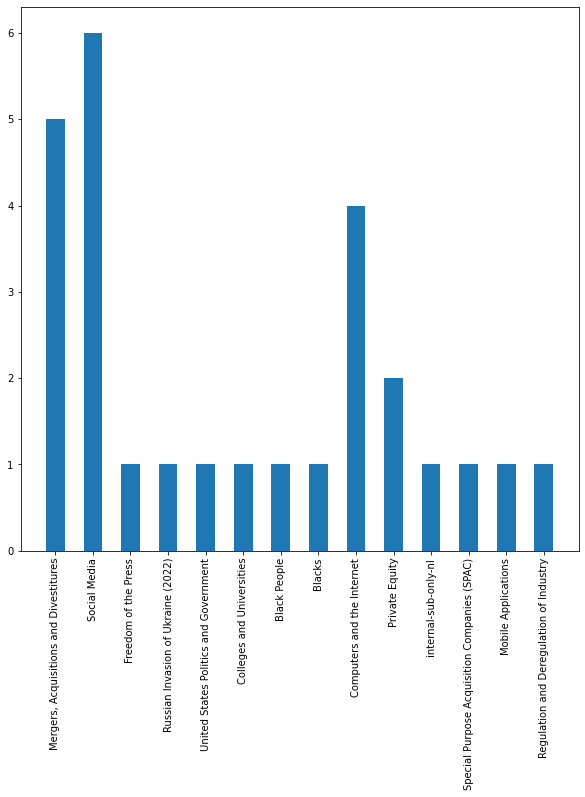

In [7]:
pd.set_option('display.max_colwidth', -1)

plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_xticklabels(counts.keys(), rotation=90)

plt.bar(counts.keys(), counts.values(), width=.5)
plt.show()

The news articles about Twitter were collected for year of 2022. Total articles collected is 27.

<AxesSubplot:xlabel='pub_date'>

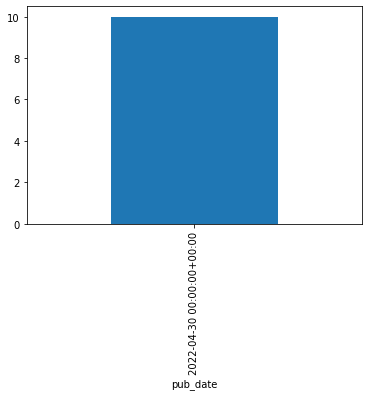

In [8]:
#Number of articles published each month
df.resample('M', on='pub_date').size().plot(kind='bar')

<AxesSubplot:ylabel='news_desk'>

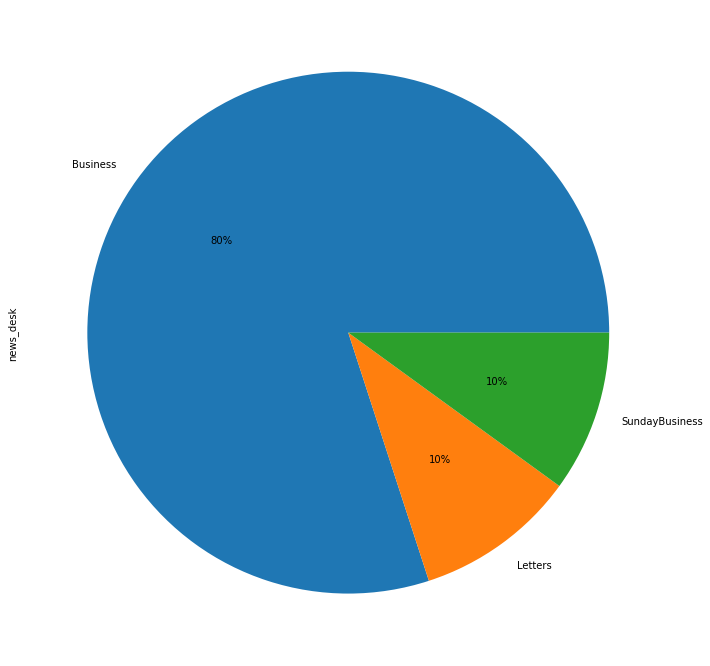

In [9]:
#plot percentage inside chart
plt.figure(figsize=(12,12))
df['news_desk'].value_counts().plot(kind='pie', autopct='%1.0f%%')
